# Evaluation Metrics for NN Regression
<hr>

Evaluation metrics are dependent on the type of problem you are working on. Since we are working on a regression, two of the main metrics are:
1. **MAE:** mean absolute error, "on average how wrong is each of the model's predictions."
2. **MSE:** mean square error, "square the average errors."

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
# demo data
X = tf.range(-100, 100, 4)
y = X + 10

# split the data into train and test set
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

# Build the model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 67.5247 - mae: 67.5247
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 61.4750 - mae: 61.4750
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 55.7682 - mae: 55.7682
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 50.1261 - mae: 50.1261
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 44.7541 - mae: 44.7541
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 39.4311 - mae: 39.4311
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 34.1159 - mae: 34.1159
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 28.7017 - mae: 28.7017
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 23.6318 - mae: 23.6318
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 18.6332 - mae: 18.6332
Epoch 11/100
2/2 [==============================] - 0s 7ms

2/2 [==============================] - 0s 5ms/step - loss: 2.1193 - mae: 2.1193
Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 1.9027 - mae: 1.9027
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 1.7772 - mae: 1.7772
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 1.6952 - mae: 1.6952
Epoch 92/100
2/2 [==============================] - 0s 6ms/step - loss: 1.4280 - mae: 1.4280
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 1.4060 - mae: 1.4060
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 1.1734 - mae: 1.1734
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 1.0104 - mae: 1.0104
Epoch 96/100
2/2 [==============================] - 0s 7ms/step - loss: 1.0603 - mae: 1.0603
Epoch 97/100
2/2 [==============================] - 0s 6ms/step - loss: 1.0890 - mae: 1.0890
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 1.2690 - ma

In [10]:
# make prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 71ms/step


array([[ 70.238655],
       [ 74.26532 ],
       [ 78.291985],
       [ 82.31866 ],
       [ 86.34531 ],
       [ 90.37198 ],
       [ 94.398636],
       [ 98.42531 ],
       [102.45197 ],
       [106.47863 ]], dtype=float32)

In [13]:
X[40:],y[40:]

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

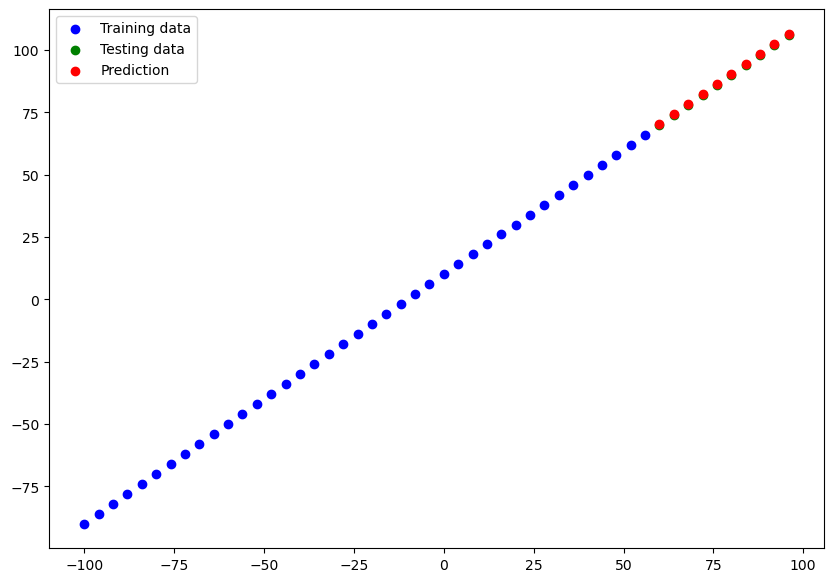

In [11]:
# Visualize the prediction
# visualize using a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    """
    plot training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # plot model prediction
    plt.scatter(test_data, predictions, c="r", label="Prediction")
    # show legend
    plt.legend();
    
plot_predictions()

## Evaluation Metrics

In [14]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 207ms/step - loss: 0.3586 - mae: 0.3586


[0.35864487290382385, 0.35864487290382385]

**Compare `y_pred` to `y_test`**

In [21]:
y_test = tf.cast(y_test, dtype=tf.float32)
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [22]:
y_pred = tf.constant(y_pred)
y_pred 

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.238655],
       [ 74.26532 ],
       [ 78.291985],
       [ 82.31866 ],
       [ 86.34531 ],
       [ 90.37198 ],
       [ 94.398636],
       [ 98.42531 ],
       [102.45197 ],
       [106.47863 ]], dtype=float32)>

In [23]:
# calculate the mean absolute error
mae = tf.keras.metrics.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.809076, 14.640808, 12.283206, 10.736269, 10.      , 10.074396,
       10.959455, 12.655185, 15.161578, 18.47863 ], dtype=float32)>

**Make sure the shape of `y_pred` and `y_test` are the same**

In [25]:
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.238655,  74.26532 ,  78.291985,  82.31866 ,  86.34531 ,
        90.37198 ,  94.398636,  98.42531 , 102.45197 , 106.47863 ],
      dtype=float32)>

In [26]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

## MSE & MAE

In [27]:
# calculate the mean absolute error
mae = tf.keras.metrics.MAE(y_test, y_pred)
mae

# the same as mae = tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.35864487>

In [30]:
# calculate the mean square error
mse = tf.keras.losses.MSE(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.13449168>

## Comparing Tensorflow models. Click <a href="./05 - Comparing models.ipynb">here</a>